# Lab 3 - Natural Language Processing with NLTK


## Due: Thursday, Sep 27, 2018, 11:59:00pm

### Submission instructions
After completing this homework, you will turn in two files via Canvas ->  Assignments -> Lab 3:
Your Notebook, named si330-lab3-YOUR_UNIQUE_NAME.ipynb and
the HTML file, named si330-lab3-YOUR_UNIQUE_NAME.html

### Name:  Samantha Cohen 
### Uniqname: samcoh
### People you worked with: Rhead and Will


## Objectives
After completing this Lab, you should know how to use NLTK to:
* Normalize and Tokenize your text data
* Parts of Speech tagging of a sentence

## Installing NLTK

The Natural Language Toolkit, or more commonly `NLTK`, is a suite of Python libraries and programs for symbolic and statistical natural language processing (NLP) for English corpus.

You will install a package directly from Jupyter Notebooks.

In your terminal (i.e. **not** in Jupyter notebook), type:

```sh
conda install -n si330 nltk matplotlib
```

Once those packages are installed, come back into this notebook and continue the lab

In [2]:
import nltk, re
from collections import defaultdict

NLTK comes with many corpora, toy grammars, trained models, etc. A complete list is posted at: http://nltk.org/nltk_data/

In the next code chunk, you will install some of the popular datasets ("corpora") from NLTK.

In [3]:
# You can remove this cell once you've installed the corpora
#nltk.download('popular')

## Background

NLTK's corpora contains texts from the Gutenberg project. In today's lab we will be working on text from Shakespeare's Julius Caesar. In the chunk below, you can see what books are available in this corpus.

In [4]:
# Text files present in the Gutenberg Corpora
for i in nltk.corpus.gutenberg.fileids():
    print(i)

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


Now let's import Julius Caesar and save it in a variable.
### <font color="magenta">Print the first 1000 characters to see what the text looks like.</font> 

We want to get Julius Caesar as raw text. 
There are other ways in which you could load text from this corpus, but we will use raw text

In [5]:
caesar = nltk.corpus.gutenberg.raw('shakespeare-caesar.txt')

# CHANGE ME: Add code below to print the first 1000 characters of Julius Caesar
first_1000 =caesar[:1000]
print(first_1000)

[The Tragedie of Julius Caesar by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Flauius, Murellus, and certaine Commoners ouer the Stage.

  Flauius. Hence: home you idle Creatures, get you home:
Is this a Holiday? What, know you not
(Being Mechanicall) you ought not walke
Vpon a labouring day, without the signe
Of your Profession? Speake, what Trade art thou?
  Car. Why Sir, a Carpenter

   Mur. Where is thy Leather Apron, and thy Rule?
What dost thou with thy best Apparrell on?
You sir, what Trade are you?
  Cobl. Truely Sir, in respect of a fine Workman, I am
but as you would say, a Cobler

   Mur. But what Trade art thou? Answer me directly

   Cob. A Trade Sir, that I hope I may vse, with a safe
Conscience, which is indeed Sir, a Mender of bad soules

   Fla. What Trade thou knaue? Thou naughty knaue,
what Trade?
  Cobl. Nay I beseech you Sir, be not out with me: yet
if you be out Sir, I can mend you

   Mur. What mean'st thou by that? Mend mee, thou
sawcy Fellow?

## Part 1. Normalization and Tokenization

Next, we will normalize and tokenize the text from the play. We will use the <b>```RegexpTokenizer```</b> from  <b>```nltk.tokenizer```</b> package. This will allow us to write our own regular expression and tokenize the text. You only want the words, so write your regular expression accordingly.

### <font color="magenta">Write code to normalize the text, then tokenize the text into words using regex.</font>

In [6]:
from nltk.tokenize import RegexpTokenizer

Normalize the text by converting it to lower case:

In [7]:
normalized_caesar = caesar.lower()   # CHANGE ME: Fill in the code to normalize the text of `caesar`

Then, tokenize the text. `RegexpTokenizer` takes a regular expression that matches tokens (i.e., words); fill in a regular expression to pull out the words from the text of Julius Caesar:

In [8]:
tokenizer = RegexpTokenizer(r'\w+')        # CHANGE ME: Fill in with the right regular expression.
word_tokens = tokenizer.tokenize(normalized_caesar)  # CHANGE ME: Pass the normalized text to this method.
#print(word_tokens)



For testing, print the first 20 words:

In [9]:
print(word_tokens[:20])

['the', 'tragedie', 'of', 'julius', 'caesar', 'by', 'william', 'shakespeare', '1599', 'actus', 'primus', 'scoena', 'prima', 'enter', 'flauius', 'murellus', 'and', 'certaine', 'commoners', 'ouer']


## Part 2. Types, tokens and token-type ratio
A useful measure to calculate is the token-type ratio (TTR), or the **average number of occurances of each word**. For that, we need to calculate the total number of words (tokens), and the number of unique words (types).
### <font color="magenta">Calculate the token-type ratio (TTR) for the selected text.</font>

Write code to calculate the number of types, tokens and then divide the number of types by the number of tokens.  

Note that there are multiple ways to do this. Use whichever way you like.

In [10]:
word_type_counts = len(set(word_tokens))
# CHANGE ME: code here
token_type_ratio = len(word_tokens)/word_type_counts
#token_type_ratio
#None # Calculate the token-type ratio (average number of occurrences of each word)

In [11]:
print('On average, a word appears {:4.3f} times'.format(token_type_ratio))

On average, a word appears 6.914 times


*Note: sometimes TTR is calculated as the type-token ratio instead, which is the inverse of the token-type ratio you calculated above*

## Part 3. Bigrams
Bigrams are sequences of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. A bigram is an n-gram for n=2. The frequency distribution of every bigram in a string is commonly used for simple statistical analysis of text in many applications, including in computational linguistics, cryptography, speech recognition, and so on.

Here, you will retrieve all the bigrams from the text, store them in a dictionary, and count the number of times each bigram occurs.  nltk makes this easy by providing a bigram() function.  You can get a list of bigrams with the following code:

```python
list_of_bigrams = list(nltk.bigrams(['more', 'is', 'said', 'than', 'done']))
print(list_of_bigrams)
```

Which outputs:

```
[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]
```

A list comprehension allows us to print the results.  If you omit list() from the above statement, you get a generator, which is useful if you just want to iterate over the list of bigrams (which is what you want to do below), but not so great if you want to print out the results.

### For each bigram - a pair of two words occuring one after the other - store it in a dictionary along with the number of times it has occured

Use the `nltk.bigrams()` function to iterate over your bigrams 
and store the number ofoccurrences of each bigram in a dictionary.
Your key should be the bigrams (a 2-tuple). Your values would be the number of occurences of the bigram.
Note: We don't need to sort the tuple as what we did in the last lab for emails. Why?

In [12]:
bigram_counts = defaultdict(int) 
for word in nltk.bigrams(word_tokens):
        bigram_counts[word] +=1 
bigram_counts


defaultdict(int,
            {('the', 'tragedie'): 2,
             ('tragedie', 'of'): 2,
             ('of', 'julius'): 1,
             ('julius', 'caesar'): 1,
             ('caesar', 'by'): 1,
             ('by', 'william'): 1,
             ('william', 'shakespeare'): 1,
             ('shakespeare', '1599'): 1,
             ('1599', 'actus'): 1,
             ('actus', 'primus'): 1,
             ('primus', 'scoena'): 1,
             ('scoena', 'prima'): 1,
             ('prima', 'enter'): 1,
             ('enter', 'flauius'): 1,
             ('flauius', 'murellus'): 1,
             ('murellus', 'and'): 2,
             ('and', 'certaine'): 1,
             ('certaine', 'commoners'): 1,
             ('commoners', 'ouer'): 1,
             ('ouer', 'the'): 1,
             ('the', 'stage'): 1,
             ('stage', 'flauius'): 1,
             ('flauius', 'hence'): 1,
             ('hence', 'home'): 1,
             ('home', 'you'): 1,
             ('you', 'idle'): 1,
             ('idle', 

Now, use the `sorted()` function to return the most commonly used bigrams in descending order

In [12]:
sorted_bigram_counts = sorted(bigram_counts.items(), key =lambda x: x[1], reverse =True) #CHANGE ME

In [13]:
# Print out the 20 most commonly used bigrams
sorted_bigram_counts[:20] # don't change this

[(('i', 'will'), 50),
 (('i', 'am'), 48),
 (('my', 'lord'), 40),
 (('in', 'the'), 40),
 (('it', 'is'), 37),
 (('i', 'haue'), 36),
 (('to', 'the'), 34),
 (('that', 'i'), 31),
 (('i', 'do'), 31),
 (('of', 'the'), 24),
 (('and', 'i'), 24),
 (('all', 'the'), 23),
 (('you', 'are'), 22),
 (('he', 'is'), 21),
 (('i', 'know'), 21),
 (('to', 'day'), 20),
 (('my', 'selfe'), 20),
 (('is', 'a'), 19),
 (('there', 'is'), 19),
 (('cassi', 'i'), 18)]

In [14]:
# Another way to print out the top 20.
# don't change this.
for k, v in sorted_bigram_counts[:20]:
    print('{:>10}:\t{}'.format('-> '.join(k), v))

  i-> will:	50
    i-> am:	48
 my-> lord:	40
  in-> the:	40
   it-> is:	37
  i-> haue:	36
  to-> the:	34
  that-> i:	31
    i-> do:	31
  of-> the:	24
   and-> i:	24
 all-> the:	23
 you-> are:	22
   he-> is:	21
  i-> know:	21
  to-> day:	20
my-> selfe:	20
    is-> a:	19
there-> is:	19
 cassi-> i:	18


## Part 4. Part of Speech Tagging
Next, we will use Part of Speech tagging to tag the words from the play. We need to pass tokenized words to this <b>```pos_tag```</b> function, which returns a list of token - tag tuples. The first two lines in the cell below import the necessary functions. 

### <font color="magenta">Pass the word tokens into pos_tag.</font>

In [15]:
# We will use these libraries for Part of Speech tagging
# don't change this
from nltk.tag import pos_tag
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
word_tags = pos_tag(word_tokens) # CHANGE ME: change 'None' to your list of word tokens
#pos_tag: telling you what part of speech it is 
#tag identifer for what type of word it is 
#print(word_tags)

Next, we will calculate the frequency distribution of each word type (tag). We will use the <b>```nltk.FreqDist()```</b>.

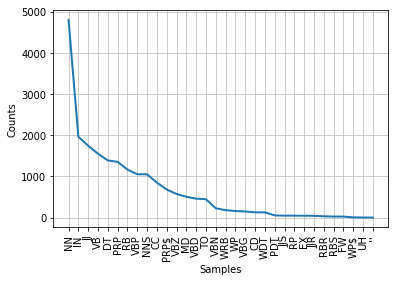

In [17]:
fd = nltk.FreqDist(tag for (word, tag) in word_tags)
fd.plot()

## Part 5. Tokenization vs. regex

Get the names of all the characters (cast members for clarity) from the play. Cast members are the ones with the lines. This can be done using either <b>```nltk's RegexpTokenizer```</b> or <b>```re.findall```</b>. First try out the <b>```nltk's RegexpTokenizer```</b>. Print the set of character names. (Make sure the character names don't appear twice.)  If you have time and energy, write code to do the same thing using re.findall().

<b>Note: we will be using the raw text, stored in the variable ```caesar``` for this, and not your tokenized words.</b>

Consider the following excerpt:
```
  Flauius. Hence: home you idle Creatures, get you home:
Is this a Holiday? What, know you not
(Being Mechanicall) you ought not walke
Vpon a labouring day, without the signe
Of your Profession? Speake, what Trade art thou?
  Car. Why Sir, a Carpenter
```

There are two cast members in the above text: Flauius and Car.  Don't worry about the fact that Car is an abbreviation.  You should notice that the cast member names are preceded by a variable number of spaces (at least two) at the beginning of a line, followed by a single capitalized word, followed by a period.

### <font color="magenta">Write the regular expression to tokenize and return only the cast member names and print out the names of the cast members and the number of different cast members.</font>

Use RegexpTokenizer to pull out the cast member tokens and store the output in `cast_member_tokens`. **Hint: if you include a group in your tokenizer expression, that group will be pulled out as the token.**

In [18]:
tokenizer = RegexpTokenizer(r'^ {2,}([A-Z][a-z]+)\.') # Fill in with the right regular expression.
#carrot means the beginning of the line 
cast_member_tokens = tokenizer.tokenize(caesar) #this will pull out the group 
print(set(cast_member_tokens),len(set(cast_member_tokens)))     # CHANGE ME: print the unique cast member names followed by the number of cast members

{'Pin', 'Ser', 'Mes', 'Dard', 'Cas', 'Popil', 'Ple', 'Clit', 'Cinna', 'Por', 'Ghost', 'Lucil', 'Oct', 'Cic', 'Titin', 'Stra', 'Treb', 'Messa', 'Bru', 'Tit', 'Brutus', 'Sold', 'Caska', 'Caesar', 'Cly', 'Lep', 'Art', 'Met', 'Mess', 'Metel', 'Vol', 'All', 'Cassi', 'Flauius', 'Fla', 'Cyn', 'Cin', 'Pind', 'Deci', 'Sooth', 'Pub', 'Mur', 'Cass', 'Clau', 'Poet', 'Var', 'Car', 'Cato', 'An', 'Cask', 'Cassius', 'Decius', 'Dec', 'Brut', 'Caes', 'Br', 'Calp', 'Octa', 'Both', 'Cai', 'Volum', 'Ant', 'Cob', 'Cobl', 'Luc', 'Cal'} 66
